# Procesamiento de Lenguaje Natural con spaCy
## Análisis del texto: "El Corazón Delator" de Edgar Allan Poe

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/WillianReinaG/PNL_unidad1/blob/main/1_NLP_spacy_ElCorazonDelator.ipynb)

Este notebook realiza un análisis completo de procesamiento de lenguaje natural (NLP) en español utilizando spaCy.

**Instalación de dependencias:** Instala spaCy y descarga el modelo pre-entrenado para español que incluye tokenizador, analizador de dependencias y reconocedor de entidades.

In [1]:
!pip install spacy -q
!python -m spacy download es_core_news_sm -q
print("✓ spaCy instalado")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 72.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✓ spaCy instalado


**Importar librerías:** Cargamos spaCy, el Matcher para búsqueda de patrones, pandas y Counter para análisis de frecuencias.

In [2]:
import spacy
from spacy.matcher import Matcher
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
nlp = spacy.load("es_core_news_sm")
print("✓ Modelo cargado")

✓ Modelo cargado


**Cargar el texto:** Anuncia que se leerá el archivo El_corazon_delator.txt, que es el corpus del análisis.

In [3]:
# Detectar si estamos en Google Colab
try:
    from google.colab import files
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Si estamos en Colab, descargar el archivo
if IN_COLAB:
    !wget https://raw.githubusercontent.com/WillianReinaG/PNL_unidad1/main/El_corazon_delator.txt -O ./El_corazon_delator.txt

# Cargar y procesar el archivo
with open('./El_corazon_delator.txt', 'r', encoding='utf-8') as file:
    texto = file.read()

print(f"Texto cargado. Longitud: {len(texto)} caracteres")
print(f"\nPrimer párrafo:\n{texto[:300]}...")

--2026-02-23 03:00:46--  https://raw.githubusercontent.com/WillianReinaG/PNL_unidad1/main/El_corazon_delator.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4447 (4.3K) [text/plain]
Saving to: ‘./El_corazon_delator.txt’

./El_corazon_delato 100%[===================>]   4.34K  --.-KB/s    in 0s      

2026-02-23 03:00:46 (52.4 MB/s) - ‘./El_corazon_delator.txt’ saved [4447/4447]

Texto cargado. Longitud: 4390 caracteres

Primer párrafo:
"El corazón delator" es un relato corto del escritor estadounidense Edgar Allan Poe, publicado por primera vez en 1843. Está narrado por un narrador anónimo que intenta convencer al lector de la cordura del narrador mientras describe simultáneamente un asesinato cometido por el narrador. La víctima ...


**Procesar el texto:** spaCy analiza el texto completo aplicando tokenización, etiquetado de partes del lenguaje, análisis de dependencias y reconocimiento de entidades.

doc es la representación de spaCy del texto procesado.

A partir de doc podrás obtener tokens, oraciones, lemas, POS, entidades, etc.

In [4]:
doc = nlp(texto)
print("✓ Texto procesado")

✓ Texto procesado


**Contar tokens:** Un token es cada palabra, número o símbolo de puntuación. Cuenta cuántos tokens generó spaCy para todo el texto.

In [5]:
total_tokens = len(doc)
print(f"Total de tokens: {total_tokens}")

Total de tokens: 866


**Análisis de oraciones:** Identificamos todas las oraciones en el documento y mostramos las primeras como ejemplo.

In [6]:
sentences = list(doc.sents)
print(f"Total de oraciones: {len(sentences)}")
print(f"\nPrimeras 3 oraciones:")
for i, sent in enumerate(sentences[:3], 1):
    print(f"{i}. {sent.text[:80]}...")

Total de oraciones: 34

Primeras 3 oraciones:
1. "El corazón delator" es un relato corto del escritor estadounidense Edgar Allan ...
2. Está narrado por un narrador anónimo que intenta convencer al lector de la cordu...
3. La víctima era un anciano con un "ojo de buitre" azul pálido y fino, como lo lla...


**Tercera oración:** Extraemos la tercera oración del documento.

In [7]:
if len(sentences) >= 3:
    tercera_oracion = sentences[2]
    print(f"Tercera oración:\n{tercera_oracion.text}")

Tercera oración:
La víctima era un anciano con un "ojo de buitre" azul pálido y fino, como lo llama el narrador.


**Análisis detallado de tokens:** Para cada token en la tercera oración, mostramos su texto, POS tag (parte del lenguaje), DEP tag (relación sintáctica) y lemma (forma canónica).

In [8]:
if len(sentences) >= 3:
    print("Token\tPOS\tDEP\tLemma")
    print("-" * 60)
    for token in tercera_oracion:
        print(f"{token.text}\t{token.pos_}\t{token.dep_}\t{token.lemma_}")

Token	POS	DEP	Lemma
------------------------------------------------------------
La	DET	det	el
víctima	NOUN	nsubj	víctima
era	AUX	cop	ser
un	DET	det	uno
anciano	NOUN	ROOT	anciano
con	ADP	case	con
un	DET	det	uno
"	PUNCT	punct	"
ojo	NOUN	nmod	ojo
de	ADP	case	de
buitre	NOUN	nmod	buitre
"	PUNCT	punct	"
azul	ADJ	amod	azul
pálido	ADJ	amod	pálido
y	CCONJ	cc	y
fino	ADJ	conj	fino
,	PUNCT	punct	,
como	SCONJ	mark	como
lo	PRON	obj	él
llama	VERB	acl	llamar
el	DET	det	el
narrador	NOUN	nsubj	narrador
.	PUNCT	punct	.


**Sintagmas nominales:** Extrae grupos de palabras que funcionan como sustantivos (ej: "El viejo corazón").

In [9]:
noun_chunks = list(doc.noun_chunks)
print(f"Total de sintagmas nominales: {len(noun_chunks)}")
print(f"\nPrimeros 15:")
for i, chunk in enumerate(noun_chunks[:15], 1):
    print(f"{i}. {chunk.text}")

Total de sintagmas nominales: 197

Primeros 15:
1. El corazón delator
2. escritor estadounidense
3. Edgar Allan Poe
4. primera vez
5. 1843
6. un narrador anónimo
7. que
8. lector
9. la cordura
10. narrador
11. un asesinato cometido por el narrador
12. La víctima
13. un "ojo
14. buitre" azul pálido y fino
15. lo


**Verbos:** Busca todos los verbos en el documento y muestra los únicos (agrupados por lema para evitar duplicados).

In [10]:
verbos = [token for token in doc if token.pos_ == "VERB"]
verbos_unicos = sorted(set([v.lemma_ for v in verbos]))

print(f"Total de verbos: {len(verbos)}")
print(f"Verbos únicos: {len(verbos_unicos)}")
print(f"\nPrimeros 20 verbos:")
for i, verbo in enumerate(verbos_unicos[:20], 1):
    print(f"{i}. {verbo}")

Total de verbos: 88
Verbos únicos: 68

Primeros 20 verbos:
1. abrir
2. aclarar
3. adentrar
4. afirmar
5. amar
6. angustiar
7. apartar
8. asegurar
9. asesinar
10. asesinar él
11. atacar
12. aumentar
13. colocar
14. cometer
15. concluir
16. conducir
17. confesar
18. considerar
19. contrastar
20. convencer


**Reconocimiento de entidades:** Identifica nombres específicos como personas, lugares, eventos, fechas, etc.

In [11]:
print("Entidades encontradas:")
entidades_dict = {}
for ent in doc.ents:
    if ent.label_ not in entidades_dict:
        entidades_dict[ent.label_] = []
    if ent.text not in entidades_dict[ent.label_]:
        entidades_dict[ent.label_].append(ent.text)

for label, entities in sorted(entidades_dict.items()):
    print(f"\n{label}:")
    for ent in entities[:5]:
        print(f"  - {ent}")

Entidades encontradas:

LOC:
  - Está
  - Saltan
  - Aterrorizado

MISC:
  - La víctima era un anciano
  - El narrador enfatiza el cálculo cuidadoso del asesinato
  - La historia
  - The Pioneer
  - El narrador

PER:
  - Edgar Allan Poe
  - James Russell Lowell
  - Poe


**Búsqueda de patrones:** Usa el Matcher para encontrar patrones específicos: un VERBO seguido de un ADVERBIO (actividades con intensidad).

In [12]:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "VERB"}, {"POS": "ADV"}]
matcher.add("Vigorous_Activities", [pattern])
matches = matcher(doc)

print(f"Patrones encontrados: {len(matches)}")
print(f"\nPrimeros 5:")
for i, (match_id, start, end) in enumerate(matches[:5], 1):
    print(f"{i}. {doc[start:end].text}")

Patrones encontrados: 8

Primeros 5:
1. describe simultáneamente
2. manipula tanto
3. insistir también
4. adentre aún
5. hace más


**Palabras más frecuentes:** Identifica las palabras con mayor frecuencia, excluyendo stop words (palabras comunes como "el", "de", etc.).

In [13]:
palabra_freq = Counter()
for token in doc:
    if not token.is_stop and token.is_alpha:
        palabra_freq[token.lemma_] += 1

print("20 palabras más frecuentes:")
print("-" * 40)
for palabra, freq in palabra_freq.most_common(20):
    print(f"{palabra:<20} {freq:>5} veces")

20 palabras más frecuentes:
----------------------------------------
narrador                38 veces
anciano                 17 veces
ojo                      7 veces
corazón                  6 veces
asesinato                6 veces
latido                   5 veces
buitre                   4 veces
cuerpo                   4 veces
tabla                    4 veces
suelo                    4 veces
delator                  3 veces
detalle                  3 veces
insistir                 3 veces
noche                    3 veces
habitación               3 veces
relato                   2 veces
corto                    2 veces
Poe                      2 veces
narrado                  2 veces
intentar                 2 veces


Histograma de la distribución de longitudes de oraciones en el texto El Corazón Delator.

El eje X es el número de palabras por oración.

Rl eje Y es la Frecuencia es decir cuántas oraciones tienen esa longitud.

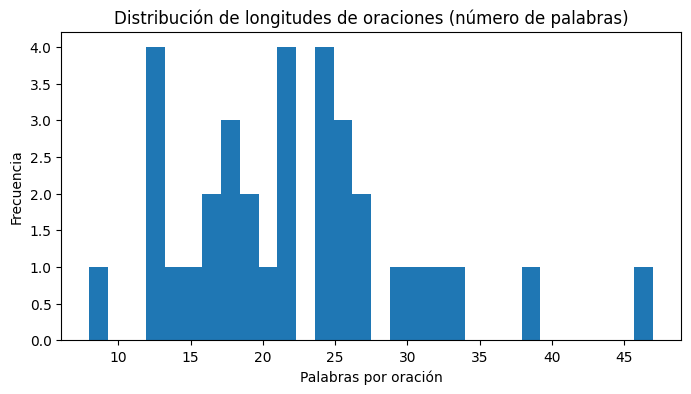

Oraciones totales: 34
Promedio palabras/oración: 22.264705882352942
Máximo palabras/oración: 47


In [14]:
sent_lens = []
for sent in doc.sents:
    # Contar solo tokens tipo palabra (alfabéticos)
    n_words = sum(1 for t in sent if t.is_alpha)
    sent_lens.append(n_words)

plt.figure(figsize=(8,4))
plt.hist(sent_lens, bins=30)
plt.title("Distribución de longitudes de oraciones (número de palabras)")
plt.xlabel("Palabras por oración")
plt.ylabel("Frecuencia")
plt.show()

print("Oraciones totales:", len(sent_lens))
print("Promedio palabras/oración:", sum(sent_lens)/len(sent_lens))
print("Máximo palabras/oración:", max(sent_lens))

La mayoría de las oraciones están entre aproximadamente 15 y 25 palabras; Hay algunas oraciones más largas que tienen hasta cerca de 45 palabras; Hay pocas oraciones muy cortas con menos de 10 palabras.

# **Análisis léxico estructural basado en categorías gramaticales.**

In [15]:
def top_by_pos(doc, pos_tag, top_n=20):
    tokens = [
        t.lemma_.lower()
        for t in doc
        if t.pos_ == pos_tag and t.is_alpha and not t.is_stop
    ]
    return Counter(tokens).most_common(top_n)

top_nouns = top_by_pos(doc, "NOUN", 20)
top_verbs = top_by_pos(doc, "VERB", 20)
top_adjs  = top_by_pos(doc, "ADJ", 20)

print("Top NOUN:", top_nouns[:10])
print("Top VERB:", top_verbs[:10])
print("Top ADJ :", top_adjs[:10])

Top NOUN: [('narrador', 38), ('anciano', 15), ('ojo', 7), ('corazón', 6), ('asesinato', 6), ('latido', 5), ('buitre', 4), ('cuerpo', 4), ('tabla', 4), ('suelo', 4)]
Top VERB: [('insistir', 3), ('intentar', 2), ('provocar', 2), ('negar', 2), ('sentir', 2), ('abrir', 2), ('decidir', 2), ('revelar', 2), ('oir', 2), ('aumentar', 2)]
Top ADJ : [('delator', 3), ('corto', 2), ('narrado', 2), ('azul', 2), ('pálido', 2), ('fino', 2), ('cuidadoso', 2), ('específico', 2), ('anciano', 2), ('fuerte', 2)]
